Data Extraction, Transformation, and Loading (ETL)

In [11]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
# Check for missing values
print(df.isnull().sum)

# Drop rows with missing values (if any)
df = df.dropna()

<bound method DataFrame.sum of         age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0     False  False  False     False  False  False    False    False  False   
1     False  False  False     False  False  False    False    False  False   
2     False  False  False     False  False  False    False    False  False   
3     False  False  False     False  False  False    False    False  False   
4     False  False  False     False  False  False    False    False  False   
...     ...    ...    ...       ...    ...    ...      ...      ...    ...   
1020  False  False  False     False  False  False    False    False  False   
1021  False  False  False     False  False  False    False    False  False   
1022  False  False  False     False  False  False    False    False  False   
1023  False  False  False     False  False  False    False    False  False   
1024  False  False  False     False  False  False    False    False  False   

      oldpeak  slope     ca   th

In [15]:
# Display the info of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [22]:
# Data Transformation
df.fillna(df.mean(), inplace=True)
df = pd.get_dummies(df, drop_first=True)


In [23]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))


In [24]:
# Creating the final DataFrame
df_final = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_final['target'] = df['target']


In [25]:

df_final.to_csv('cleaned_heart_disease_data.csv', index=False)

Step 2: Exploratory Data Analysis (EDA)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

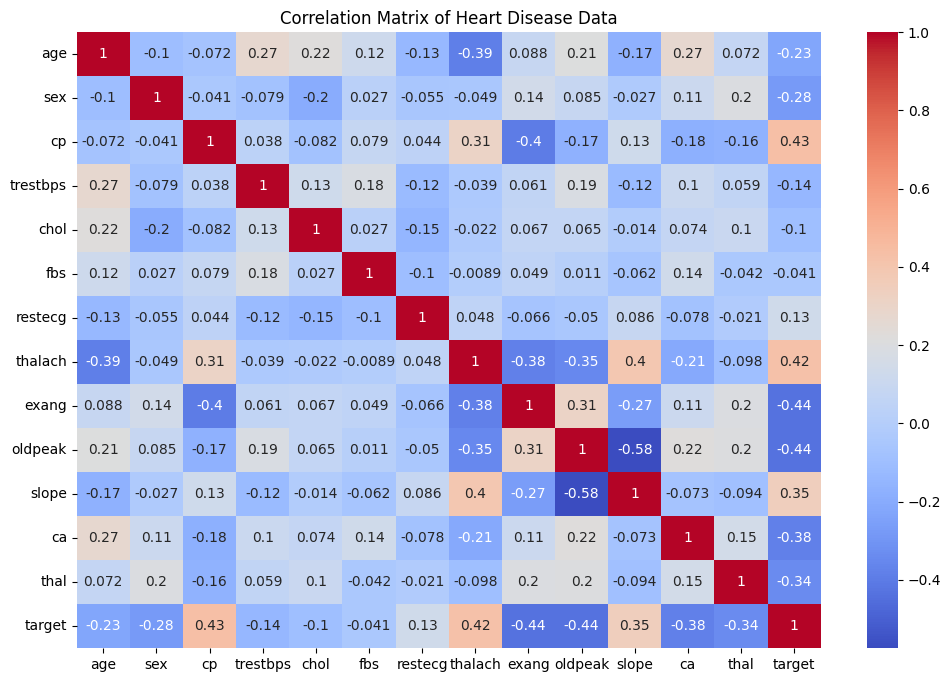

In [27]:

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Heart Disease Data')
plt.show()


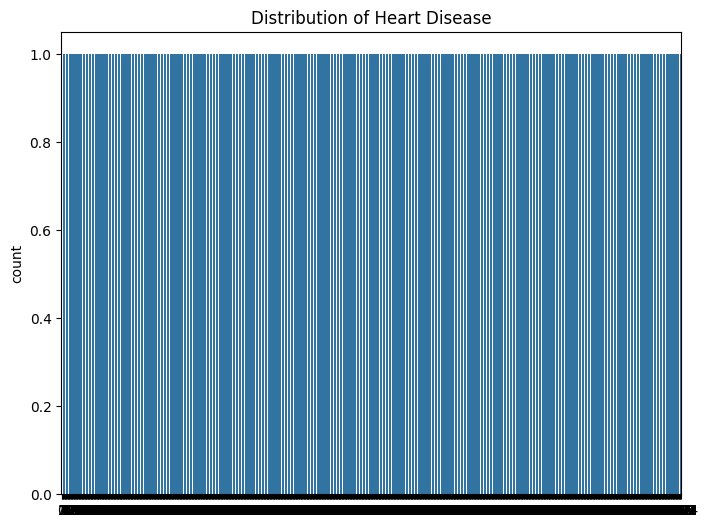

In [28]:
# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(df_final['target'])
plt.title('Distribution of Heart Disease')
plt.show()

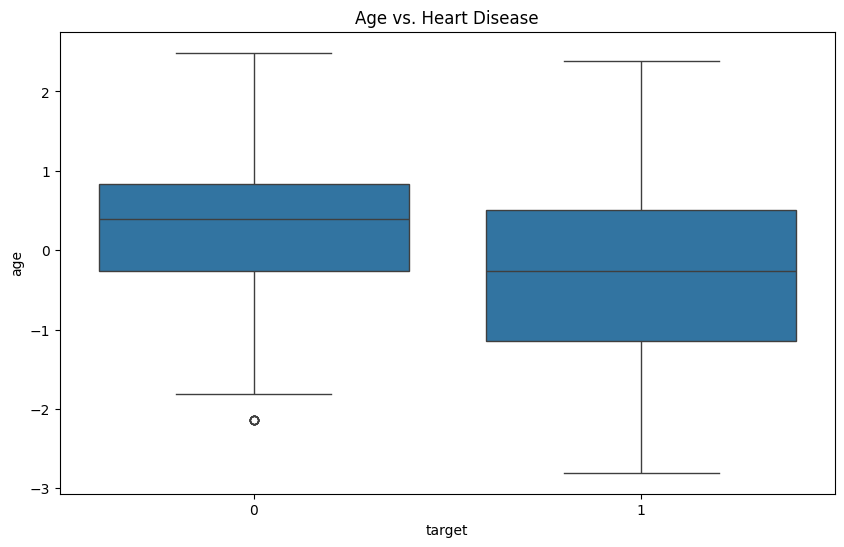

In [29]:
# Boxplot by Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df_final)
plt.title('Age vs. Heart Disease')
plt.show()

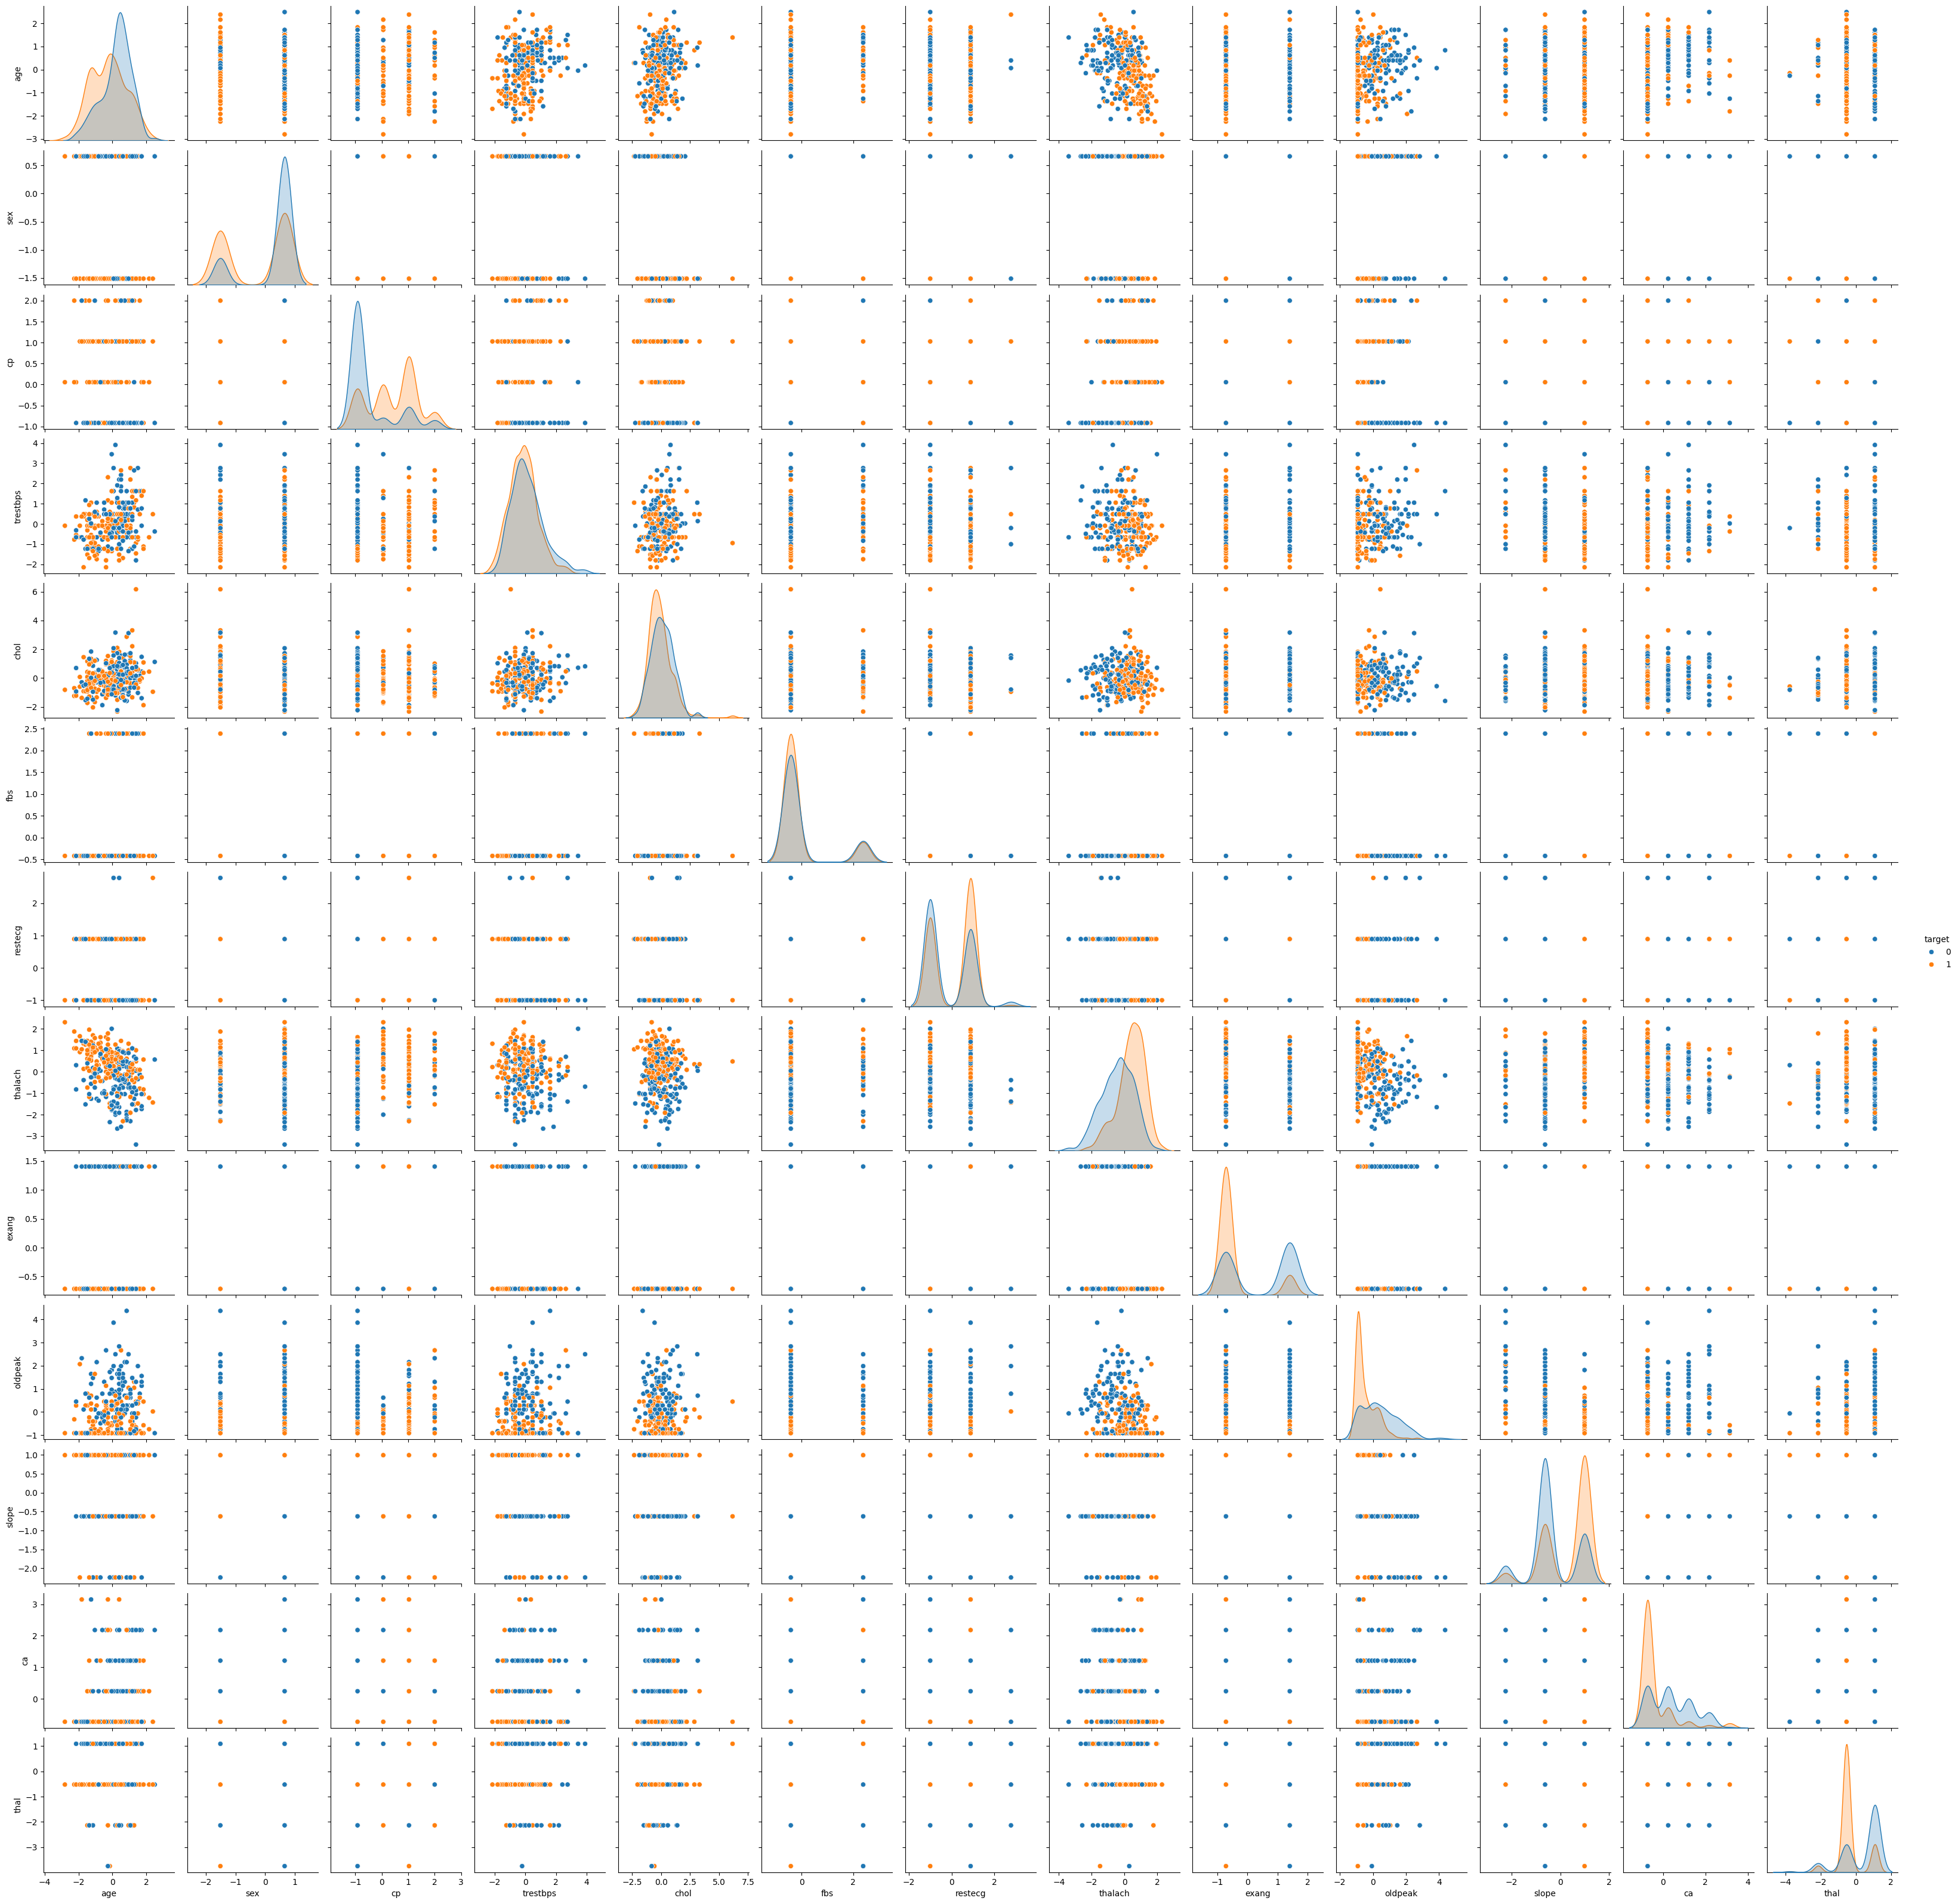

In [30]:
# Pairplot to examine relationships between features
sns.pairplot(df_final, hue='target', diag_kind='kde')
plt.show()

Additional Plots for Enhanced Visualization

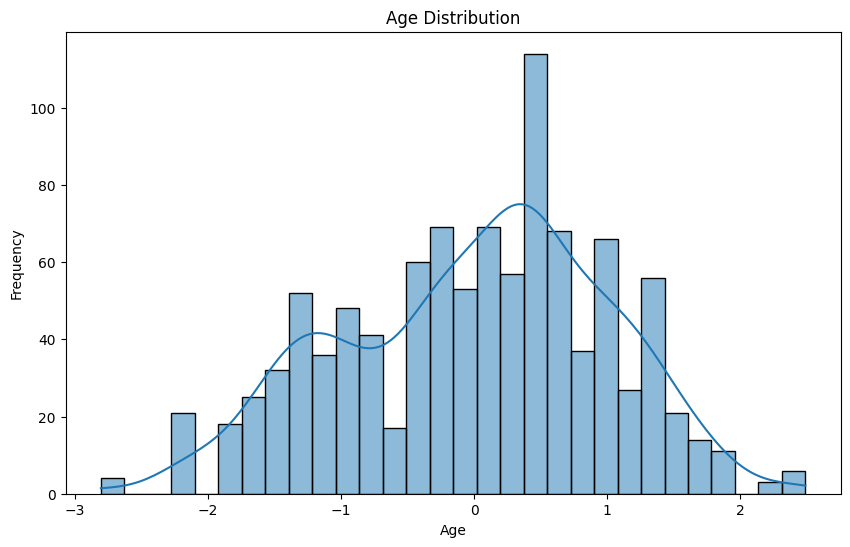

In [32]:
# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_final['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

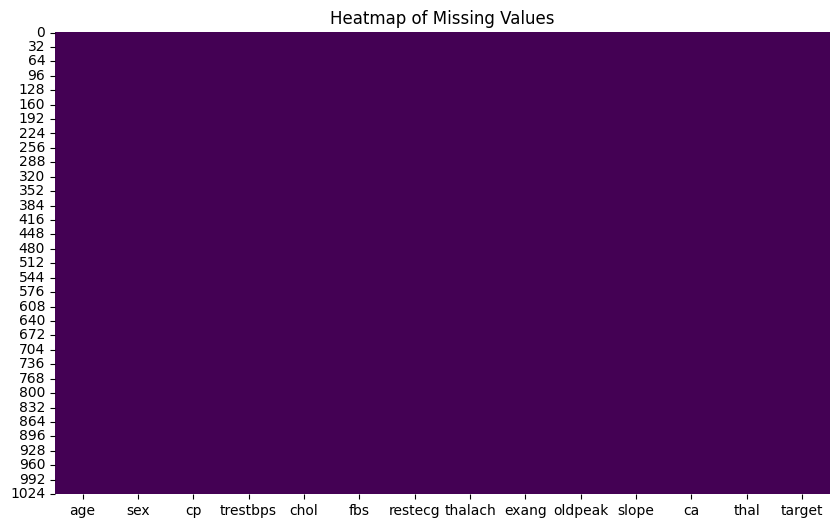

In [33]:
# Heatmap of Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df_final.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


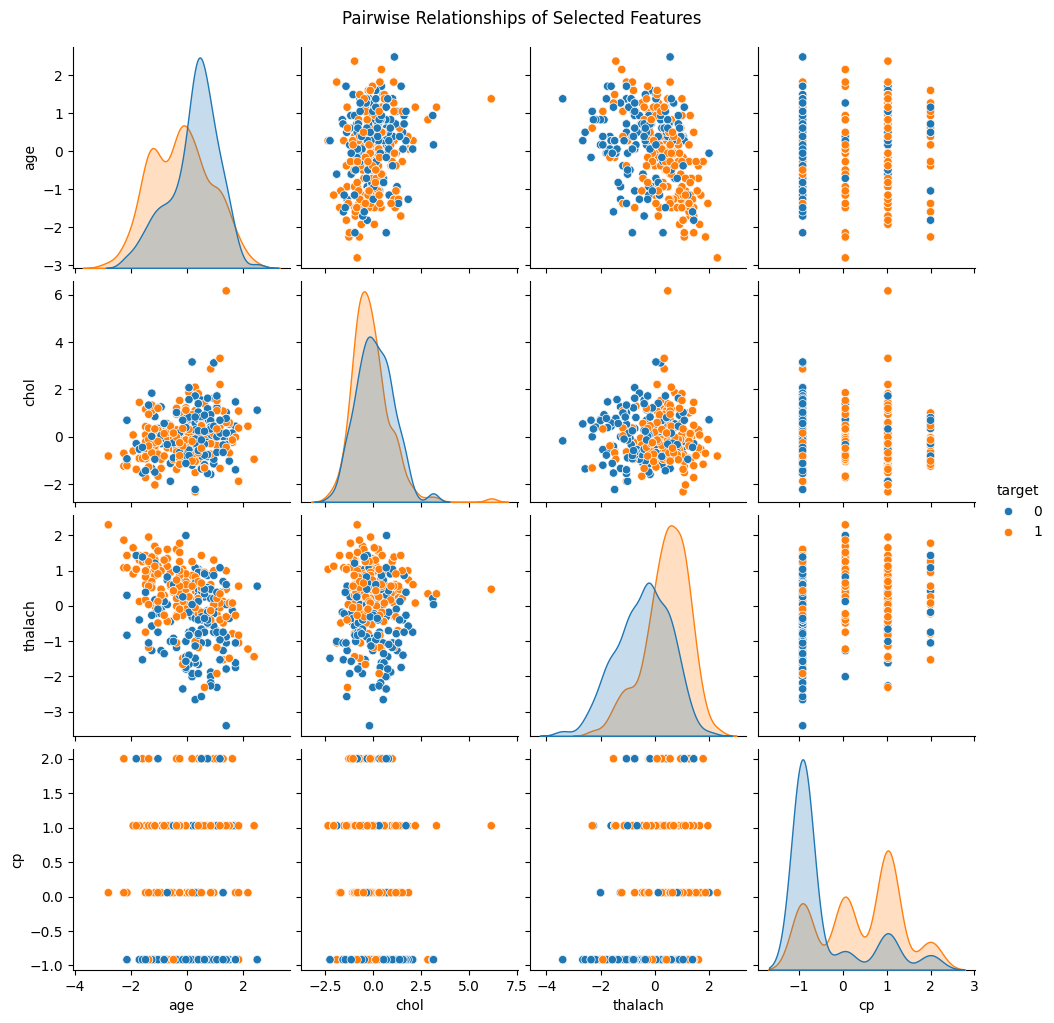

In [34]:
# Pairwise Relationships of Selected Features
selected_features = ['age', 'chol', 'thalach', 'cp', 'target']
sns.pairplot(df_final[selected_features], hue='target')
plt.suptitle('Pairwise Relationships of Selected Features', y=1.02)
plt.show()

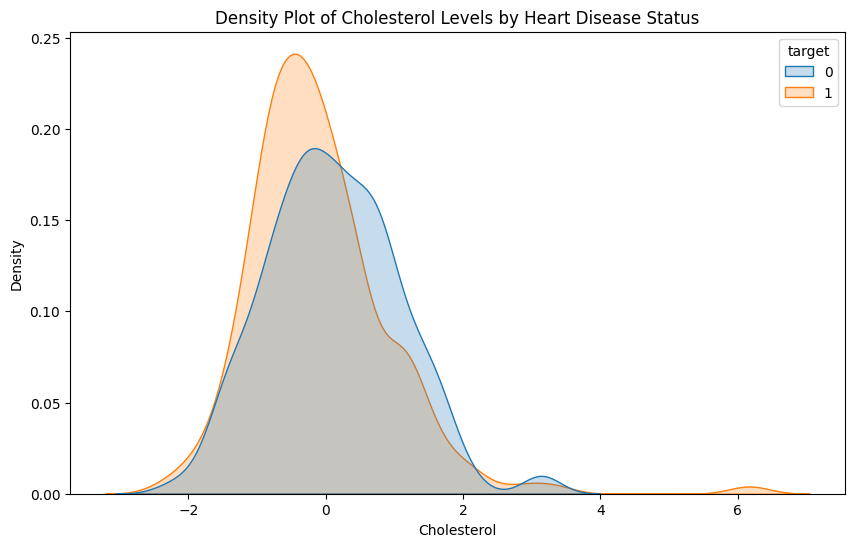

In [35]:
# Density Plot for Cholesterol Levels by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_final, x='chol', hue='target', fill=True)
plt.title('Density Plot of Cholesterol Levels by Heart Disease Status')
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

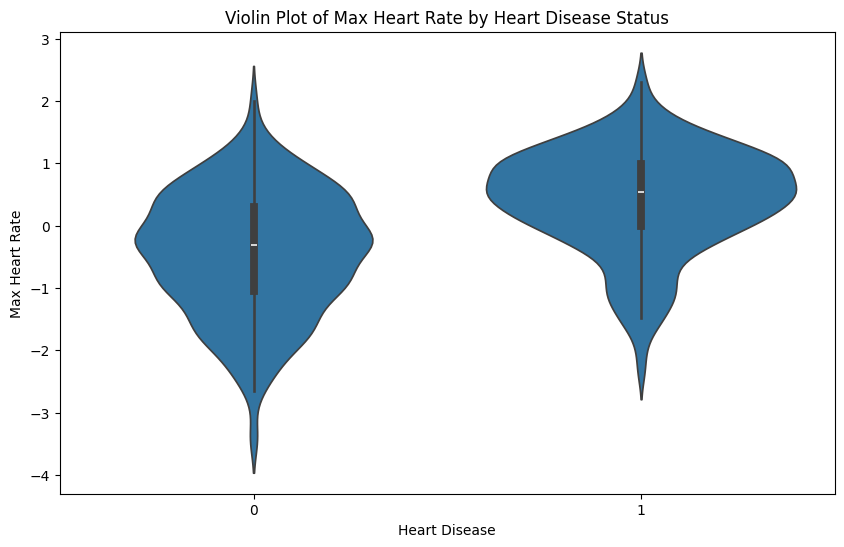

In [36]:
# Violin Plot for Maximum Heart Rate by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='thalach', data=df_final)
plt.title('Violin Plot of Max Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Max Heart Rate')
plt.show()

Histogram of Age Distribution: Shows how ages are distributed across the dataset.

Heatmap of Missing Values: Displays missing data, if any.

Pairwise Relationships: Examines relationships between selected features.

Density Plot: Visualizes the distribution of cholesterol levels for different heart disease statuses.

Violin Plot: Combines boxplot and KDE plot to show data distribution for maximum heart rate.


Advanced Modeling

Objective: Train and evaluate a machine learning model to predict heart disease.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [38]:
# Splitting the dataset into training and testing sets
X = df_final.drop('target', axis=1)
y = df_final['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:
# Training a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9805194805194806
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



Advanced Visualization with Plotly
Objective: Create interactive visualizations using Plotly.

In [41]:
import plotly.express as px


Scatter Plot: Shows the relationship between age and maximum heart rate.
Boxplot: Compares cholesterol levels across different heart disease statuses.


In [42]:
# Scatter plot for Age vs. Max Heart Rate
fig = px.scatter(df_final, x='age', y='thalach', color='target',
                 labels={'thalach':'Max Heart Rate', 'target':'Heart Disease'})
fig.update_layout(title='Age vs. Max Heart Rate by Heart Disease')
fig.show()

In [43]:
# Boxplot for Cholesterol levels by Heart Disease
fig = px.box(df_final, x='target', y='chol', color='target',
             labels={'chol':'Cholesterol', 'target':'Heart Disease'})
fig.update_layout(title='Cholesterol Levels by Heart Disease')
fig.show()


Dataset Feature Display

In [44]:
# Display basic information about the dataset
def display_dataset_info(df):
    print("Dataset Information:")
    print(df.info())
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nCorrelation Matrix:")
    print(df.corr())

In [45]:

display_dataset_info(df_final)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   float64
 2   cp        1025 non-null   float64
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   float64
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   float64
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   float64
 13  target    1025 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 112.2 KB
None

First 5 rows of the dataset:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.268437  0.661504 -0.915755 -0.377636 -0.659332 -0.418878  0.891255   
1 -0.15815

In [46]:
# Feature Summary Table
def feature_summary(df):
    print("Feature Summary:")
    summary = df.describe().transpose()
    print(summary)

feature_summary(df_final)


Feature Summary:
           count          mean       std       min       25%       50%  \
age       1025.0 -3.431402e-16  1.000488 -2.804866 -0.709555  0.172682   
sex       1025.0  1.802352e-16  1.000488 -1.511706 -1.511706  0.661504   
cp        1025.0  5.545699e-17  1.000488 -0.915755 -0.915755  0.055931   
trestbps  1025.0 -7.036106e-16  1.000488 -2.148237 -0.663216 -0.092055   
chol      1025.0 -3.466062e-18  1.000488 -2.327054 -0.678724 -0.116353   
fbs       1025.0 -4.159275e-17  1.000488 -0.418878 -0.418878 -0.418878   
restecg   1025.0 -8.318549e-17  1.000488 -1.004049 -1.004049  0.891255   
thalach   1025.0 -4.332578e-16  1.000488 -3.397080 -0.744271  0.125502   
exang     1025.0 -7.625337e-17  1.000488 -0.712287 -0.712287 -0.712287   
oldpeak   1025.0 -2.426243e-16  1.000488 -0.912329 -0.912329 -0.231177   
slope     1025.0  1.854343e-16  1.000488 -2.243675 -0.624121 -0.624121   
ca        1025.0  1.819683e-17  1.000488 -0.731971 -0.731971 -0.731971   
thal      1025.0  2.5

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_final = pd.read_csv('cleaned_heart_disease_data.csv')

# Features and Target
X = df_final.drop('target', axis=1)
y = df_final['target']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9805194805194806
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

